In [24]:
import numpy as np
import pandas as pd


## Porto Seguro’s Safe Driver Prediction
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data?select=train.csv

In [34]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [37]:
df_train.set_index('id',inplace=True)

In [38]:
df_train

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,0,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
1488016,0,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
1488017,0,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0


In [4]:
df_train.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [5]:
df_train.target.value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

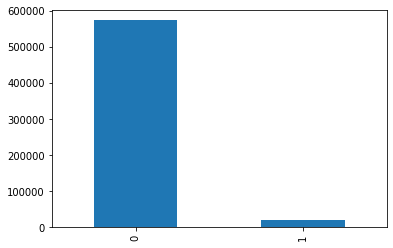

In [26]:
df_train.target.value_counts().plot(kind='bar')

## Modelling

In [39]:
# Remove 'id' and 'target' columns
labels = df_train.columns[2:]

X = df_train[labels]
y = df_train['target']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=15,class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15)

In [46]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.62%


In [47]:
from sklearn.metrics import confusion_matrix , classification_report

print("================== Confusion_Matrix =======================")
confusion_matrix(y_test,y_pred)

================== Confusion_Matrix =======================


array([[106180,   8529],
       [  3822,    512]])

In [48]:
print("================ Classsification_Report ===================")
print(classification_report(y_test,y_pred))

================ Classsification_Report ===================
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    114709
           1       0.06      0.12      0.08      4334

    accuracy                           0.90    119043
   macro avg       0.51      0.52      0.51    119043
weighted avg       0.93      0.90      0.91    119043



## Resampling

### Undersampling

In [50]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)



In [51]:
y_under.value_counts()

1    21694
0    21694
Name: target, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=1)


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.64%


In [53]:
from sklearn.metrics import confusion_matrix , classification_report

print("================== Confusion_Matrix =======================")
confusion_matrix(y_test,y_pred)

================== Confusion_Matrix =======================


array([[2701, 1696],
       [1809, 2472]])

In [54]:
print("================ Classsification_Report ===================")
print(classification_report(y_test,y_pred))

================ Classsification_Report ===================
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      4397
           1       0.59      0.58      0.59      4281

    accuracy                           0.60      8678
   macro avg       0.60      0.60      0.60      8678
weighted avg       0.60      0.60      0.60      8678



### OverSampling

In [55]:
# example of random oversampling to balance the class distribution
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)



In [56]:
y_over.value_counts()

1    573518
0    573518
Name: target, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1)


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.84%


In [60]:
from sklearn.metrics import confusion_matrix , classification_report

print("================== Confusion_Matrix =======================")
confusion_matrix(y_test,y_pred)

================== Confusion_Matrix =======================


array([[105677,   9231],
       [ 16377,  98123]])

In [61]:
print("================ Classsification_Report ===================")
print(classification_report(y_test,y_pred))

================ Classsification_Report ===================
              precision    recall  f1-score   support

           0       0.87      0.92      0.89    114908
           1       0.91      0.86      0.88    114500

    accuracy                           0.89    229408
   macro avg       0.89      0.89      0.89    229408
weighted avg       0.89      0.89      0.89    229408

